In [1]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(tidyr)
library(readr)
library(stringr)
library(ggbeeswarm)
options(scipen = 999)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
options(repr.plot.width=7, repr.plot.height=5)

In [3]:
p = ggplot() + 
    theme_light() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1),axis.title.x = element_blank(), axis.title.y = element_text(colour = "gray30", size = 9)) +
    theme(legend.direction = "horizontal", legend.position = "top", legend.title = element_blank(), legend.text = element_text(colour = "gray30", size = 9))

In [4]:
df = read.csv('num_stores.csv')
df = df %>% mutate(Name = sapply(strsplit(as.character(Benchmark), "/"), function(x) x[length(x)]))

In [5]:
df %>% head

Benchmark,Group,num_stores,num_stores_marked,dyn,dyn_silent,dyn_marked,dyn_marked_silent,Name
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
SciMark2-C,SciMark2-C,67,8,21794063853,3403842614,8413063762,0,SciMark2-C
Ptrdist/anagram,Ptrdist,40,4,339525631,42524857,7735462,6590828,anagram
Ptrdist/bc,Ptrdist,531,0,68706764,15885416,0,0,bc
Ptrdist/yacr2,Ptrdist,169,1,75431380,58196609,414980,13620,yacr2
Ptrdist/ks,Ptrdist,79,2,275928,65965,65286,0,ks
Ptrdist/ft,Ptrdist,79,0,18420582,1461761,0,0,ft


In [6]:
# How many benchmarks do we have?
df %>% nrow

[1] 257

In [7]:
# How many test suites do we have?
unique(df$Group) %>% length

[1] 36

In [8]:
# How common is RO
df %>% filter(num_stores_marked > 0) %>% nrow

[1] 126

In [9]:
# number of static instances
df %>% filter(num_stores_marked > 0) %>% summarize(sum(num_stores))

sum(num_stores)
<int>
101107


In [10]:
# number of static instances marked
df %>% filter(num_stores_marked > 0) %>% summarize(sum(num_stores_marked))

sum(num_stores_marked)
<int>
1569


In [11]:
# number of dynamic instances
df %>% filter(num_stores_marked > 0) %>% summarize(sum(dyn))

sum(dyn)
<dbl>
988223728822


In [12]:
# dynanmic marked
df %>% filter(num_stores_marked > 0) %>% summarize(sum(dyn_marked_silent))

sum(dyn_marked_silent)
<dbl>
29765251126


In [13]:
# dynamic, marked and silent
df %>% filter(num_stores_marked > 0) %>% summarise(sum(dyn_marked_silent) / sum(dyn))

sum(dyn_marked_silent)/sum(dyn)
<dbl>
0.03011995


In [14]:
# RO between 1 or 2
df %>% filter(num_stores_marked > 0 & num_stores_marked <= 2) %>% nrow

[1] 52

In [15]:
# What is the mean of RO?
df %>% filter(num_stores_marked > 0) %>% mutate(r = num_stores_marked / num_stores) %>% summarize (mean(r), sd(r))

mean(r),sd(r)
<dbl>,<dbl>
0.09617003,0.1269789


In [16]:
df %>% filter(num_stores_marked > 0) %>% mutate(r = num_stores_marked / num_stores)

Benchmark,Group,num_stores,num_stores_marked,dyn,dyn_silent,dyn_marked,dyn_marked_silent,Name,r
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
SciMark2-C,SciMark2-C,67,8,21794063853,3403842614,8413063762,0,SciMark2-C,0.119402985
Ptrdist/anagram,Ptrdist,40,4,339525631,42524857,7735462,6590828,anagram,0.100000000
Ptrdist/yacr2,Ptrdist,169,1,75431380,58196609,414980,13620,yacr2,0.005917160
Ptrdist/ks,Ptrdist,79,2,275928,65965,65286,0,ks,0.025316456
VersaBench/dbms,VersaBench,235,7,60565863,19731458,306966,306961,dbms,0.029787234
VersaBench/bmm,VersaBench,8,1,1077936131,1032327134,1073741824,1030768838,bmm,0.125000000
VersaBench/beamformer,VersaBench,67,2,178673442,12436892,8212480,0,beamformer,0.029850746
CoyoteBench/lpbench,CoyoteBench,21,4,2690721929,2000,2674666000,0,lpbench,0.190476190
NPB-serial/is,NPB-serial,35,1,1757436183,136628613,23068661,11,is,0.028571429


In [89]:
df %>% filter(Name == 'consumer-jpeg')

Benchmark,Group,num_stores,num_stores_marked,dyn,dyn_silent,dyn_marked,dyn_marked_silent,Name
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
MiBench/consumer-jpeg,MiBench,2395,12,2180276,1509921,7792,3965,consumer-jpeg


In [68]:
round(0.2342, digits = 3)

[1] 0.234

In [86]:
df %>% 
    filter(Group != 'PolyBench' & Group != 'cpu2006') %>%
    mutate(p = dyn_marked_silent / dyn_marked) %>%
    mutate(mag = log10(dyn) %>% round) %>%
    mutate(p = round(p, digits = 2)) %>%
    filter(num_stores_marked > 0 & p >= 0.50 & dyn > 1000000) %>%
    arrange(Group, Name) %>%
    select(Group, Name, Benchmark, num_stores_marked, p, dyn, mag)
#     write.csv('selected.csv')

Group,Name,Benchmark,num_stores_marked,p,dyn,mag
<fct>,<chr>,<fct>,<int>,<dbl>,<dbl>,<dbl>
cBench,src,cBench/consumer_jpeg_c/src,11,0.74,1452140424,9
DOE_ProxyApps_C,miniGMG,DOE_ProxyApps_C/miniGMG,24,0.79,442487372,9
FreeBench,neural,FreeBench/neural,2,0.75,510094241,9
MallocBench,cfrac,MallocBench/cfrac,3,0.85,814476871,9
MallocBench,espresso,MallocBench/espresso,39,0.91,99431649,8
MallocBench,gs,MallocBench/gs,26,0.68,9174749,7
McCat,08-main,McCat/08-main,1,0.92,15216946,7
MiBench,consumer-jpeg,MiBench/consumer-jpeg,12,0.51,2180276,6
Misc,ffbench,Misc/ffbench,2,0.99,295214850,8


In [87]:
df %>% 
    filter(Group != 'PolyBench' & Group != 'cpu2006') %>%
    mutate(p = dyn_marked_silent / dyn_marked) %>%
    mutate(mag = log10(dyn) %>% round) %>%
    mutate(p = round(p, digits = 2)) %>%
    filter(num_stores_marked > 0 & p >= 0.50 & dyn > 1000000) %>%
    arrange(Group, Name) %>%
    select(Name) %>% write.csv('sel.csv')

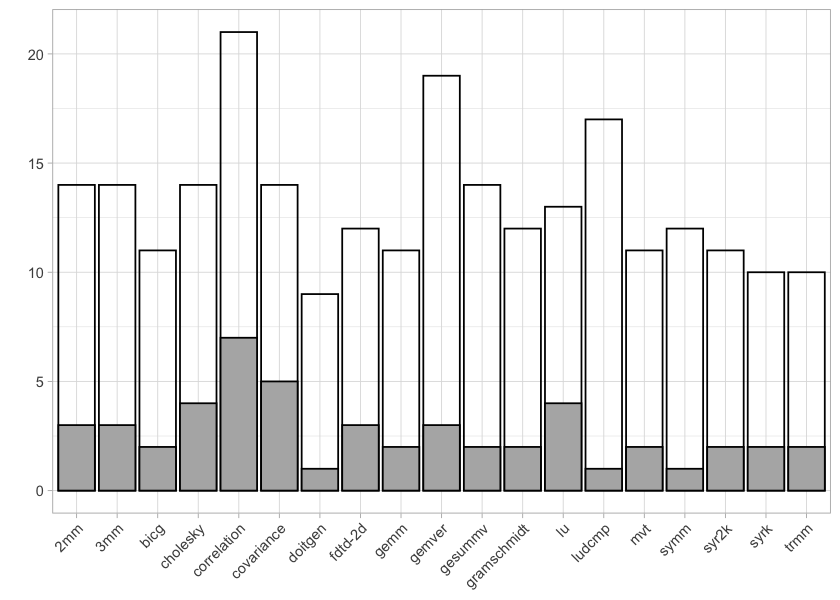

In [36]:
poly = df %>% filter(Group == "PolyBench") %>% filter(dyn_marked > 0) %>% select (Benchmark, Name, num_stores, num_stores_marked)

p + 
    geom_bar(data = poly, aes(x = Name, y = num_stores), stat = "identity", color="black", fill="transparent") + 
    geom_bar(data = poly, aes(x = Name, y = num_stores_marked), stat = "identity", color="black", fill="gray70") +
    ylab('')
#     ggsave('polybench.pdf', device = 'pdf', height = 3, width = 3.5)

In [51]:
r %>% nrow

[1] 76

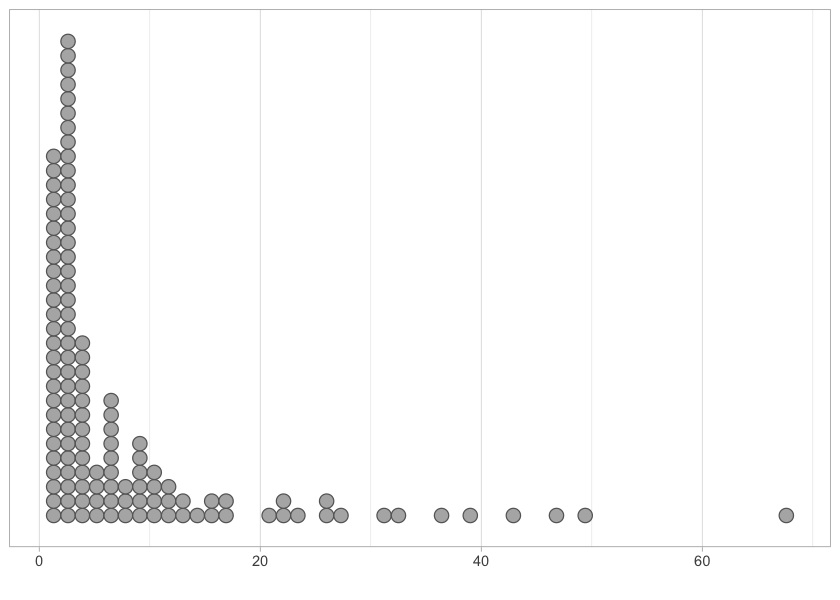

In [79]:
# what is the ratio distribution?
r = df %>% filter(num_stores_marked > 0 & num_stores_marked <= 100) 
# %>% mutate(r = num_stores_marked / num_stores)

ggplot() + 
    theme_light() +
    geom_dotplot(data = r, aes(x = num_stores_marked), method = 'histodot', fill = 'gray70', color = 'gray40', binwidth = 1.3) + 
    ylab("") +
    xlab("") +
    theme(legend.position = "none") +
    scale_y_continuous(breaks = NULL) + 
#     scale_x_continuous(breaks = NULL) + 
#     ylim(0, 30) +
#     theme(axis.title.x=element_blank(), axis.text.x=element_blank()) +
    theme(axis.title.y=element_blank(), axis.text.y=element_blank()) +
    ggsave("static_instances.pdf", device = "pdf", height = 3, width = 4)

In [ ]:
# only this is not enough!
# how is the prevalence among dynamic instances?

In [163]:
r %>% filter(num_stores_marked > 10) %>% nrow

[1] 27

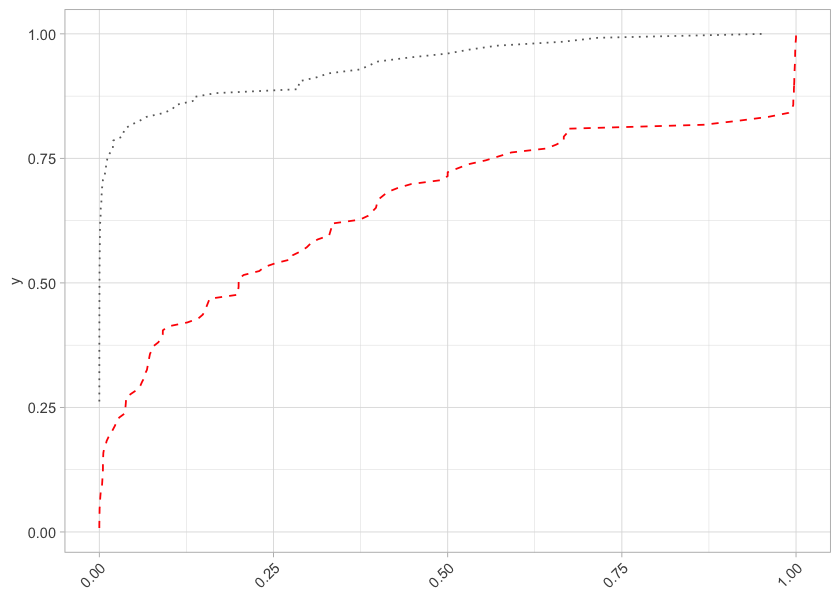

In [264]:
m = df %>% filter(num_stores_marked > 0)

p +
    geom_line(data = m, aes(x = dyn_marked/dyn), stat = 'ecdf', colour = 'red', linetype=2, pad = F) + 
    geom_line(data = m, aes(x = dyn_marked_silent/dyn), stat = 'ecdf', colour = 'gray41', linetype=3, pad = F)

In [87]:
ggsave("ratio_all_benchs.pdf", device = "pdf", width = 9, height = 5)

In [85]:
# ratio polybench

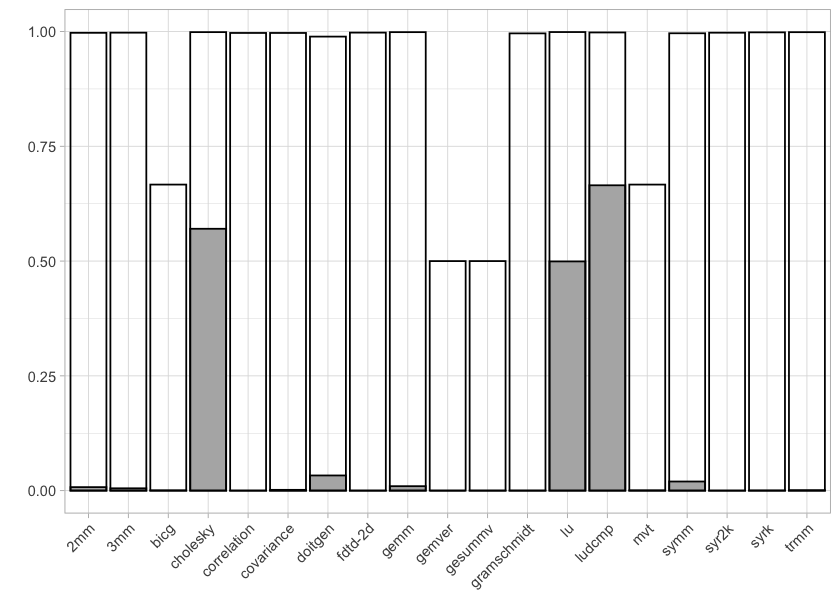

In [385]:
m = df %>% filter(num_stores_marked > 0) %>% filter(Group == "PolyBench")

p +
    geom_bar(data = m, aes(x = Name, y = dyn_marked_silent/dyn), stat = 'identity', color = 'black', fill = 'gray70') +
    geom_bar(data = m, aes(x = Name, y = dyn_marked/dyn), stat = 'identity', color = 'black', fill = 'transparent') + 
    ylab('') +
    ggsave('polybench.pdf', height = 5, width = 7)

In [393]:
m

Benchmark,Group,num_stores,num_stores_marked,dyn,dyn_silent,dyn_marked,dyn_marked_silent,Name
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
PolyBench/linear-algebra/kernels/doitgen,PolyBench,9,1,4054122903,133872738,4009500000,133758482,doitgen
PolyBench/linear-algebra/kernels/bicg,PolyBench,11,2,2673120005,2230531,1782000000,1458019,bicg
PolyBench/linear-algebra/kernels/mvt,PolyBench,11,2,1200080005,921999,800000000,627995,mvt
PolyBench/linear-algebra/kernels/3mm,PolyBench,14,3,2706690007,16219874,2700000000,13617874,3mm
PolyBench/linear-algebra/kernels/2mm,PolyBench,14,3,1661590007,13331930,1656960000,12588616,2mm
PolyBench/linear-algebra/blas/trmm,PolyBench,10,2,5209801003,4598401,5202600000,4595402,trmm
PolyBench/linear-algebra/blas/syrk,PolyBench,10,2,6777941304,1923561,6765981300,1920141,syrk
PolyBench/linear-algebra/blas/symm,PolyBench,12,1,5217000005,103526566,5197400000,103402520,symm
PolyBench/linear-algebra/blas/gesummv,PolyBench,14,2,1600080007,128001,800000000,64000,gesummv
